In [14]:
from sklearn.datasets import fetch_openml
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
mnist_X

mnist = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=False)
mnist

x, y = mnist["data"], mnist["target"]

In [ ]:
# ■■■■■■■■■■■■■■■■■■■■■■■■■
# コード例
# ■■■■■■■■■■■■■■■■■■■■■■■■■
x_centered = x - x.mean(axis=0)
u, s, vt = np.linalg.svd(x_centered)
c1 = vt.T[:, 0]
c2 = vt.T[:, 1]
w2 = vt.t[:, :2]
x2d = x_centered.dot(w2)

In [ ]:
# ■■■■■■■■■■■■■■■■■■■■■■■■■
# コード例
# ■■■■■■■■■■■■■■■■■■■■■■■■■

from sklearn.decomposition import PCA
pca = PCA(n_componets=2)
x2d = pca.fit_trainsform(x)

# 寄与率の表示
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.exlained_variance_ration_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
# ■■■■■■■■■■■■■■■■■■■■■■■■■
# コード例
# ■■■■■■■■■■■■■■■■■■■■■■■■■

pca = PCA(n_componets=0.95)
pca.fit(x_train)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.decomposition import PCA
pca = PCA(n_components=154)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [17]:
print(x_reduced.shape)
print(x_recovered.shape)

(56000, 154)
(56000, 784)


In [20]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(x_batch)
    
x_reduced = inc_pca.transform(x_train)

In [21]:
x_reduced.shape

(56000, 154)

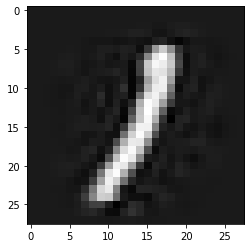

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_recovered[0].reshape(28, 28), cmap="gray")

In [ ]:
x_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, svd_solver="randomized")
inc_pca.fit(x_mm)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
x_reduced = rbf_pca.fit_transform(x)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline(
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
)
param_grid =[{
    "kpca__gamma" : np.linespace(0.03, 0.05, 10),
    "kpca__kernel" : ["rbf", "sigmoid"]
}]
grid.search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)
print(grid_search.best_params_)

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_preimage = rbf_pca.inverse_transform(x_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(x, x_preimage)

In [ ]:
from sklearn.maifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
x_reduced = lle.fit_transform(x)